# Multiple Linear Regression

## Importing the libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

## Importing the dataset

In [31]:
def Data_example():
    data = pd.read_csv('Fish.csv')
    df = data.copy()
    df.head()
    # Dependant (Target) Variable:
    
    y = df['Weight']
    # Independant Variables:
    X = df.drop(['Weight', 'Species'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, y_train, X_test, y_test


## Multiple Linear Regression

In [32]:
class Multiple_Linear_Regression():
    def __init__(self):
        self.theta = np.zeros(int(np.random.random()), float)[:, np.newaxis]

    def fit(self, X_train, y_train):
        '''
        Fit data to the model based on the matrix approach to Linear Regression. Actual magic happens here!  

        PARAMETERS:
        X_train (numpy.ndarray): Independent variables train data.
        y_train (numpy.ndarray): Dependent variable of train data.

        RETURNS:
        Nothing
        '''
        X_b = np.c_[np.ones(len(X_train)), X_train]
        # Linear algebra  pseudo-inverse
        theta_bst = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta = theta_bst
        return theta_bst

    def predict(self, X_test):
        '''
        Fucntion to predict on new data.

        PARAMETERS:
        X_test (numpy.ndarray): Independent variables data.

        RETURNS:
        y_predict (numpy.ndarray): Predicted dependent variable.
        '''
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = np.dot(X_test, self.theta)

        return y_predict
    
    def gradient_descent(self, X_train, y_train, theta ,learning_rate, iterations):
        ''''
            Gradient descent function to minimize the cost function.
            PARAMETERS:
            X_train (numpy.ndarray): Independent variables train data.
            y_train (numpy.ndarray): Dependent variable of train data.
            theta (numpy.ndarray): Initial theta values.
            learning_rate (float): Learning rate for gradient descent.
            iterations (int): Number of iterations for gradient descent.    
        '''
        m = len(y_train)
        #remove 1st element in theta
        theta = theta[1:]
        cost_history = np.zeros(iterations)
        theta_history = np.zeros((iterations, 5))

        for it in range(iterations):
            prediction = np.dot(X_train, theta)

            theta = theta - (1 / m) * learning_rate * (X_train.T.dot((prediction - y_train)))
            theta_history[it, :] = theta.T
            cost_history[it] = self.compute_cost(X_train, y_train, theta)

        return theta


    def compute_cost(self, X, y, theta):
        '''
        Function to compute the cost function.
        '''
        m = len(y)
        y_predicted = X.dot(theta)
        cost = (1 / 2 * m) * np.sum((y_predicted - y) ** 2)
        return cost

## Training the Multiple Linear Regression model on the Training set

In [33]:
X_train, y_train, X_test, y_test = Data_example()
# MLR with Gradient Descent
model = Multiple_Linear_Regression()
theta = model.fit(X_train, y_train)
model.gradient_descent(X_train, y_train, theta, 0.00001, 10000)

print('Equation for Multiple Linear Regression is')
str = ''
for i in range(len(theta)):
    str += f'{theta[i]}* b{i} +'

print('y = ',str[:-1])


Equation for Multiple Linear Regression is
y =  -517.8459982128403* b0 +23.965945762341775* b1 +6.4764107878174695* b2 +-5.542212909082696* b3 +17.227438151284222* b4 +27.352311034722828* b5 


In [34]:
y_preds = model.predict(X_test)

predicted_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})

## Predicting the Test set results

Text(0.5, 1.0, 'True Value vs. Fitted Values')

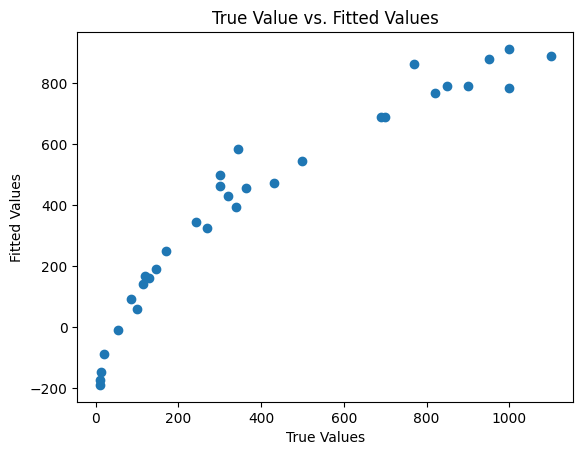

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds)
ax.set_xlabel('True Values')
ax.set_ylabel('Fitted Values')
ax.set_title('True Value vs. Fitted Values')

In [36]:
accuracy = r2_score(y_test, y_preds)
print(accuracy)

0.8882511386372685


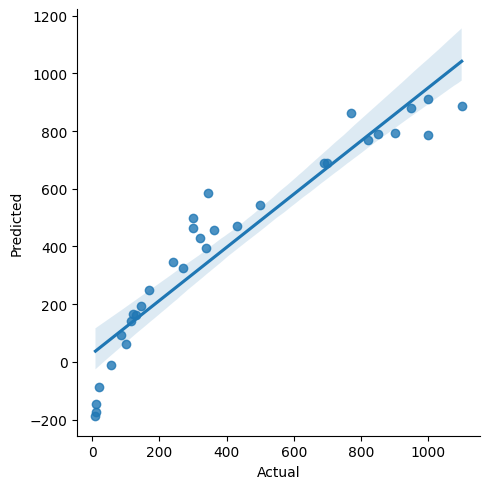

In [37]:
sns.lmplot(x='Actual', y='Predicted', data=predicted_results)